 Описательная статистика

Выполняем описательный анализ признаков  датасета :

2.1 Загружаем датасет;

2.2 Разделите признаки на две группы: категориальные и непрерывные;

2.3 Для каждого из категориальных признаков:
- рассчитайте моду;
- постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем);
- на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;   

2.4 Для каждого из непрерывных признаков:
- рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов;
- постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой;
- постройте плотность распределения и гистограмму;
- объедините на одном графике плотность распределения и вертикальные линии статистик.



**Описание данных**

Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`City`|город проживания клиента|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`estimated_salary`|заработная плата клиента|

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns # sbr, sbn

plt.style.use('tableau-colorblind10')

In [60]:
df=pd.read_csv('/content/clients_bank.csv')
df.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,estimated_salary
0,15677338,619,Ярославль,Ж,42,2,NaN,1,101348.88
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,112542.58
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,113931.57
3,15744090,699,Ярославль,Ж,39,1,NaN,2,93826.63
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,79084.10


In [14]:
# 2.2 разделим признаки на непрерывные и категориальные
lst_cont = ['balance', 'estimated_salary','age','score']

lst_cat = ['city','gender', 'objects','products']

In [62]:
#приведем признаки к нижнему регистру
df.columns=df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'estimated_salary'],
      dtype='object')

In [64]:
# 2.3 расчет моды для категориальных признаков
df.gender.mode()
print(df.gender.mode())
df.city.mode()
print(df.city.mode())
df.objects.mode()
print(df.objects.mode())
df.products.mode()
print(df.products.mode())


0    М
Name: gender, dtype: object
0    Ярославль
Name: city, dtype: object
0    2
Name: objects, dtype: int64
0    1
Name: products, dtype: int64


In [65]:
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'estimated_salary'],
      dtype='object')

<ipython-input-66-3ea8b0984919>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


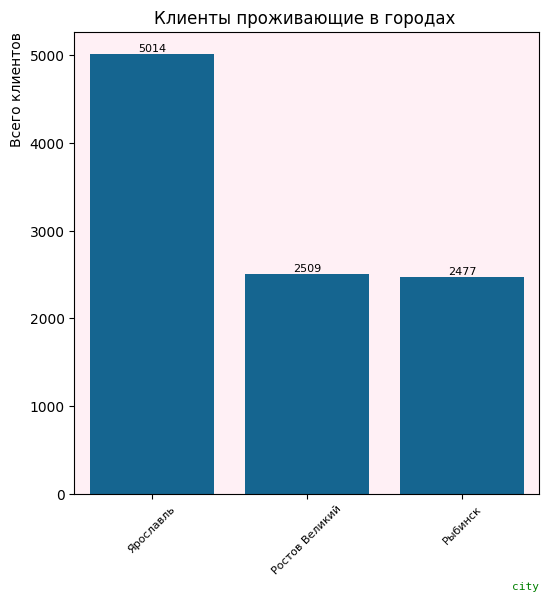

In [66]:
# построим таблицу частот для категориального признака 'city'
df['city'].value_counts();

# построим столбчатую диаграмму для категориального признака 'city'
plt.figure(figsize=(6, 6))
ax=sns.countplot(data=df,
                   x='city',
                   order=list(df['city'].value_counts().index));
ax.set_xlabel('city', # подпись по оси абцисс
           fontsize=8, # размер шрифта
           fontstyle='normal', # стиль шрифта
           color='green', # цвет шрифта
           loc = 'right', # размещение подписи
           fontfamily='monospace');
ax.set_ylabel('Всего клиентов',  loc='top');
ax.set_title(f'Клиенты проживающие в городах ');
ax.set_facecolor('lavenderblush')

ax.set_xticklabels(ax.get_xticklabels(),
                   fontsize=8,
                   rotation=45);
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.savefig('1.tiff', dpi=300)

<ipython-input-67-6d2c0ba5bdfc>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index_fig)
<ipython-input-67-6d2c0ba5bdfc>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-67-6d2c0ba5bdfc>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-67-6d2c0ba5bdfc>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index_fig)
<ipython-input-67-6d2c0ba5bdfc>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-67-6d2c0ba5bdfc>:22: UserWarning: FixedFormatte

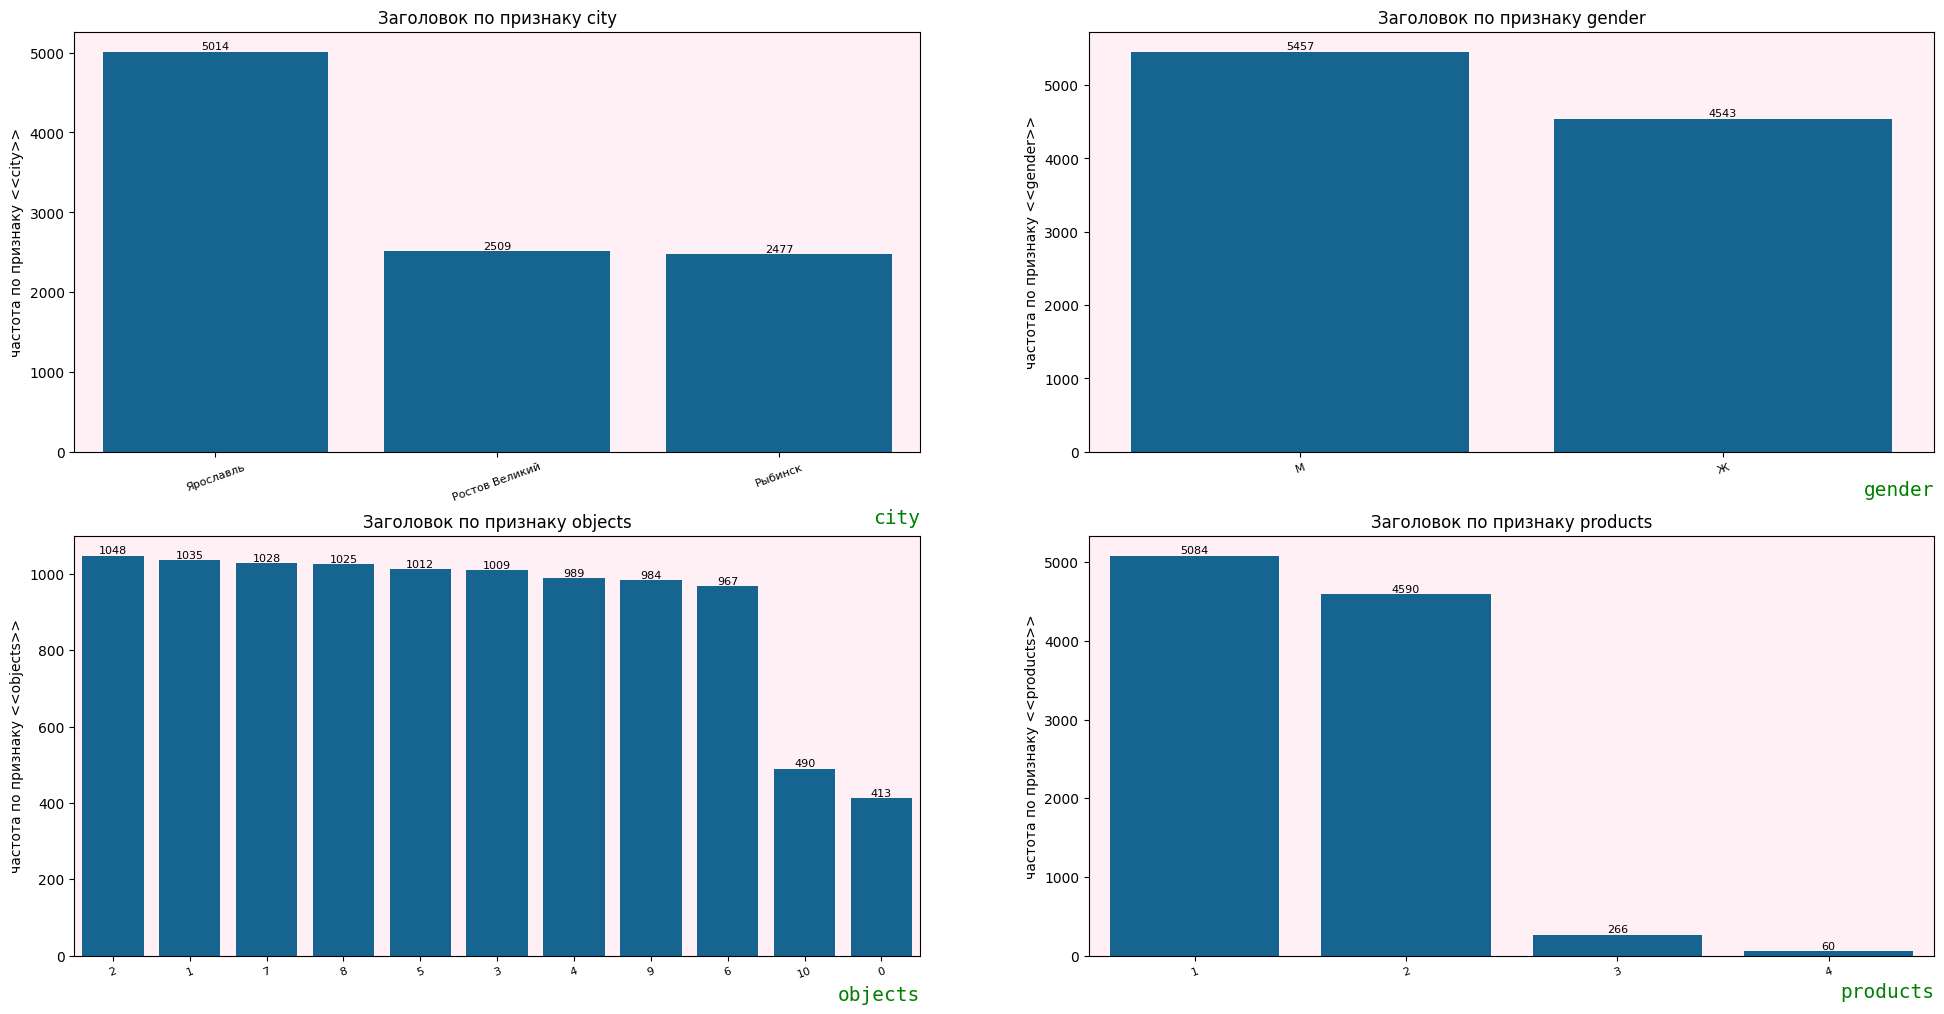

In [67]:
# отображение нескольких графиков категориальных признаков


# построим столбчатую диаграмму для всех категориальных признаков 'city' 'gender","objects","products"
plt.subplots(2, figsize=(24, 12))
for index_fig, col in enumerate(lst_cat, start=1):
    plt.subplot(2, 2, index_fig)
    ax = sns.countplot(data=df,
                       x=col,
                       order=list(df[col].value_counts().index));
    ax.set_xlabel(col, # подпись по оси абцисс
            fontsize=14, # размер шрифта
           fontstyle='normal', # стиль шрифта
           color='green', # цвет шрифта
           loc = 'right', # размещение подписи
           fontfamily='monospace');

    ax.set_ylabel(f'частота по признаку <<{col}>>');
    ax.set_title(f'Заголовок по признаку {col}');
    ax.set_facecolor('lavenderblush')
    # работа с подписями по оси
    ax.set_xticklabels(ax.get_xticklabels(),
                    fontsize=8,
                    rotation=20);

    for container in ax.containers:
        ax.bar_label(container, fontsize=8);
    if index_fig == 4:
        break


In [76]:
#2.4 рассчитайте для непрерывных признаков выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов
df.groupby('gender')[lst_cont]\
  .agg(['min', 'max', 'mean', 'median', 'var', 'std'])

balance                                                      \
             min        max           mean      median           var   
gender                                                                 
Ж        3768.69  238387.56  118975.601938  118907.600  9.101552e+08   
М       16893.59  250898.09  120531.877184  120626.945  9.012019e+08   

                     estimated_salary                                       \
                 std              min        max           mean     median   
gender                                                                       
Ж       30168.778955            91.75  199992.48  100601.541382  101905.34   
М       30020.024939            11.58  199953.33   99664.576931   98060.51   

        ...        age                               score                   \
        ...       mean median         var        std   min  max        mean   
gender  ...                                                                   
Ж       ...  39.238389   38.0  112.118191  10.588588   350  850  650.831389   
М       ...  38.658237   37.0  108.093037  10.396780   350  850  650.276892   

                                       
       median          var        std  
gender                                 
Ж       652.0  9367.791027  96.787350  
М       651.0  9321.845787  96.549706  

[2 rows x 24 columns]

In [86]:
#рассчитайте для непрерывных признаков квартили (0.01, 0.05 и 0.95, 0.99)
df['balance'].quantile(q=0.01)
print(df['balance'].quantile(q=0.01))
df['balance'].quantile(q=0.05)
print(df['balance'].quantile(q=0.05))
df['balance'].quantile(q=0.95)
print(df['balance'].quantile(q=0.95))
df['balance'].quantile(q=0.99)
print(df['balance'].quantile(q=0.99))


47505.449
70367.943
169984.256
190495.17060000004


In [101]:
# np.percentile(df['balance'].dropna(), 75)
# np.percentile(df['balance'].dropna(), 25)

# #считаем IQR --  интерквантильный размах

# IQR = np.nanpercentile(df['balance'], 75) - np.nanpercentile(df['balance'], 25)

#  рассчитаем границы усов

left_whis = np.nanpercentile(df['balance'], 25) - 1.5 * IQR
right_whis = np.nanpercentile(df['balance'], 75) + 1.5 * IQR
print(left_whis,right_whis)


41186.5025 198507.7625


In [131]:
# отбираем непрерывные признаки,для которых будем строить ящики и плотности

cont_var = ['score', 'age', 'balance' , 'estimated_salary']

In [119]:
# df.groupby('gender')[lst_cont].agg(pd.Series.mode)   ПС не получается воспользоваться данной функцией в задании,
#при этом функция работает с dataset_segment_bank

In [132]:
dict_value_mode = {col : df[col].mode()[0] for col in cont_var}
dict_value_mode



{'score': 850, 'age': 37, 'balance': 105473.74, 'estimated_salary': 24924.92}

In [136]:
lst_cont

['balance', 'estimated_salary', 'age', 'score']

<ipython-input-148-9740cd02ad87>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)
<ipython-input-148-9740cd02ad87>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)
<ipython-input-148-9740cd02ad87>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)
<ipython-input-148-9740cd02ad87>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)


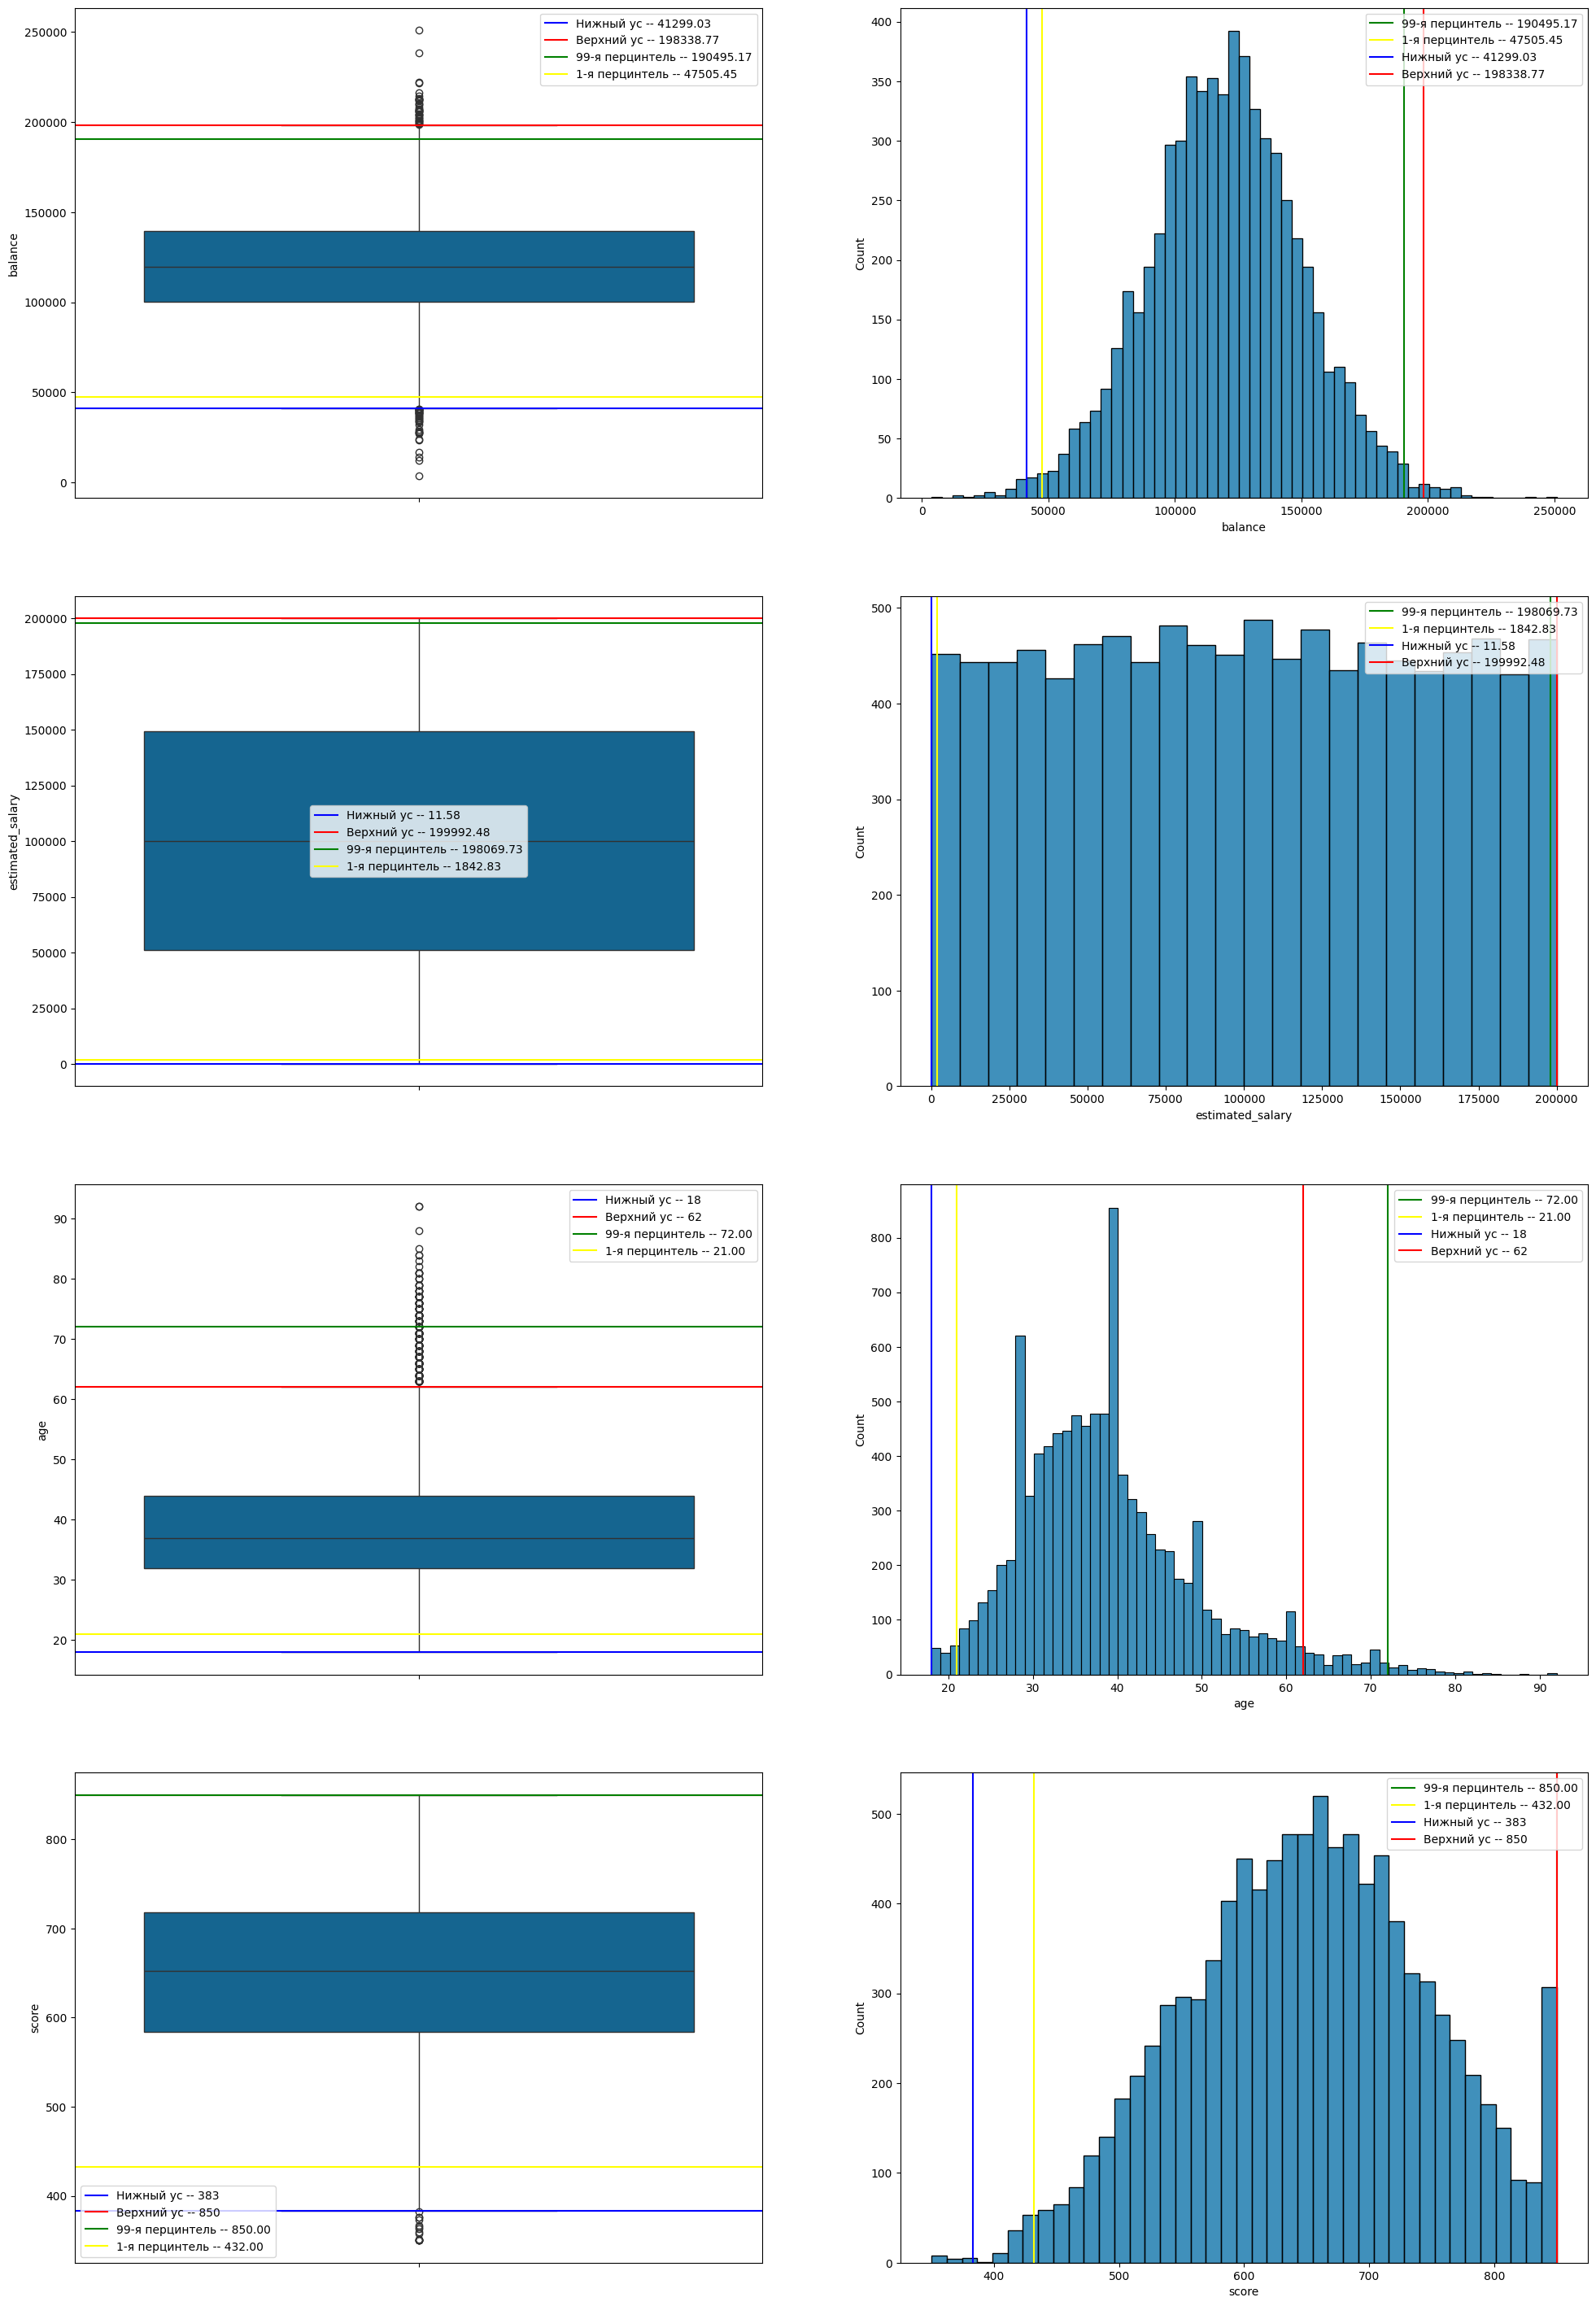

In [148]:

plt.subplots(4, figsize=(24, 36))
for index_fig, col in enumerate(lst_cont, start=0):
    plt.subplot(4, 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                 y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    plt.legend()
    plt.subplot(4, 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')

    plt.legend()




In [33]:
import math
1+3.322*math.log(10000) #количество отрезков на разбиение

31.596750715704882